In [3]:
import crystalball as cb
import pandas as pd

In [4]:
relative_directory = '../Brainwahve CSV'
ball = cb.CrystalBall.run(relative_directory)

## I am interested in searching all the csvs for "names" in order to establish identity.

In [5]:
ball.featureSearch(['name', 'Name'])

['antiVirusName',
 'commissionName',
 'criteriaName',
 'crmName',
 'employerName',
 'fileName',
 'firstName',
 'institutionName',
 'ipOrHostname',
 'lastName',
 'licenseName',
 'middleName',
 'name',
 'nickName',
 'supervisorName',
 'username',
 'vendorName']


## I see that "firstName" is a promising feature that may tell me more about identity. I need to find the table that contains that column.



In [6]:
t1 = ball.tableSearch(['firstName'])
t1

['../Brainwahve CSV/users.csv']

## I can now read the table, and analyze the contents.

In [96]:
users = ball.openTable(t1[0])
users.head(0)

,id,email,password,firstName,lastName,middleName,nickName,phoneNumber1,phoneType1,phoneNumber2,...,address,phoneNumber3,address2,zip,city,phoneExtension1,phoneExtension2,deleted,accountId,countryOther


## I am interested in the following features: id, firstName, zip, city

In [97]:
users_subtable = ball.subTable(users, ['id'], ['firstName', 'zip', 'city'])
users_subtable.head(0)

,firstName,zip,city
id,,,


## I have now established identity, as observable from the "firstName" column. Futhermore, I see that the column "id" looks promising, as it might lead me to more relevant information about each person.

In [9]:
# educated guesses as to what I am looking for
ball.contains(['ID', 'Id', 'id', 'name', 'Name', 'firstName'])

[False, True, True, True, True, True]

In [10]:
# find columns that contain the given substrings
ball.featureSearch(['id', 'Id'])

['accountId',
 'accountTypeId',
 'affiliationTypeId',
 'applicantId',
 'applicantStatusId',
 'applicant_id',
 'billingContactId',
 'categoryId',
 'clientAdvisorId',
 'clientId',
 'companyId',
 'company_id',
 'computerMemorySizeId',
 'computerOperatingSystemId',
 'computerTypeId',
 'contactId',
 'contactStatusId',
 'contactTypeId',
 'contact_id',
 'criteriaId',
 'crmEntityId',
 'dayAvailableTypeId',
 'degreeTypeId',
 'displayConnectionTypeId',
 'documentId',
 'employeeId',
 'entId',
 'fileTypeId',
 'groupId',
 'hide',
 'id',
 'impersonateId',
 'industryId',
 'industryTypeId',
 'institutionTypeId',
 'internetAgeId',
 'internetProviderId',
 'internetProviderOther',
 'internetTypeId',
 'interviewClientId',
 'isDivisionOrSubsidiary',
 'jid',
 'jobId',
 'jobTypeId',
 'job_request_id',
 'licenseTypeId',
 'message_id',
 'middleName',
 'msOfficeVersionId',
 'noteTypeId',
 'offHoursConsidered',
 'orderId',
 'outsideContactRequired',
 'parentCompanyId',
 'parentId',
 'parentSkillId',
 'partTimeWa

In [11]:
# I am interested in the following Ids: userId, accountId, employeeId, applicantId, applicant_id, placementSpecialistId, companyId
# Let's investigate the userIds
t2 = ball.tableSearch(['userId'])
t2

['../Brainwahve CSV/alerts.csv',
 '../Brainwahve CSV/applicant_profiles.csv',
 '../Brainwahve CSV/contact_profiles.csv',
 '../Brainwahve CSV/employee_profiles.csv',
 '../Brainwahve CSV/impersonation.csv',
 '../Brainwahve CSV/password_resets.csv',
 '../Brainwahve CSV/user_roles.csv']

In [98]:
# I am interested in applicant_profiles.csv
applicant_profiles = ball.openTable(t2[1])
applicant_profiles.head(0)

Skipping line 56405: unexpected end of data


,id,userId,employmentStatus,availabilityDate,totalYearsExperience,industryYearsExperience,workedLastInIndustry,foundUsVia,foundUsOther,applicantStatus,...,hourlyRateAcceptable,currentWorkStatus,gapExplanation,desiredHourlyRate,dateStatusModified,notificationSent,dateModifiedByApplicant,insuranceTypeOther,qualifiedDate,currentJobTitle


,id from user.csv,id from applicant_profiles.csv,userId from applicant_profiles.csv
count,65007.000000,56403.000000,56403.000000
mean,32777.720507,28413.748063,31190.605783
std,18945.531330,16424.387816,19382.483275
min,2.000000,35.000000,60.000000
25%,16375.500000,14209.500000,14301.500000
50%,32664.000000,28342.000000,28434.000000
75%,49227.500000,42538.500000,48935.500000
max,65705.000000,57541.000000,65705.000000


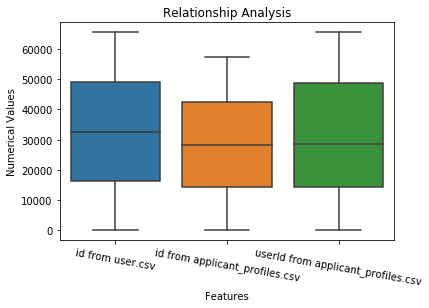

In [13]:
# I am interested in both id and userId.
# user.csv: has an "id" feature
# applicant_profiles.csv: also has an "id", as well as a "userId"
# PROBLEM: which ids match, and which don't?

# isolate the features of interest:
f1 = pd.Series(users_subtable.index)
f2 = applicant_profiles.id
f3 = applicant_profiles.userId

# to_analyze = {'user.csv': f1, 'applicant_profiles.csv': f2, 'applicant_profiles.csv': f3}
to_analyze = [['user.csv', f1], ['applicant_profiles.csv', f2], ['applicant_profiles.csv', f3]]

ball.analyzeRelationships(to_analyze)

In [14]:
ball.compareRelationship(['user.csv', f1], ['applicant_profiles.csv', f3])

,id from user.csv,userId from applicant_profiles.csv,Difference
count,65007.000000,56403.000000,8604.000000
mean,32777.720507,31190.605783,1587.114724
std,18945.531330,19382.483275,436.951945
min,2.000000,60.000000,58.000000
25%,16375.500000,14301.500000,2074.000000
50%,32664.000000,28434.000000,4230.000000
75%,49227.500000,48935.500000,292.000000
max,65705.000000,65705.000000,0.000000


### from the boxplots and the analysis tables, it is apparent that user.csv's "id" key corresponds to applicant_profiles.csv's "userId" feature. Now we can create a subtable from applicant_profiles.csv.

In [99]:
# Get birds eye view of table
applicant_profiles.iloc[:,20:30].head(0)

,mostRecentWorkFirmType,mostRecentWorkDuration,previousTypeOfWork,hasWorkedRemotely,hasWorkedRemotelyComment,currentEmploymentStatus,wantToWorkStatus,hasDedicatedHomeOffice,computerTypeId,computerOperatingSystemId


In [100]:
# select the columns you want to include in your subtable
applicant_profiles_subtable = ball.subTable(applicant_profiles, ['userId'], ['totalYearsExperience', 'industryYearsExperience', 'workedLastInIndustry'])
applicant_profiles_subtable.head(0)

,totalYearsExperience,industryYearsExperience,workedLastInIndustry
userId,,,


### now that you have generated two subtables (user_subtable and applicant_profiles_subtable) that have indexes that relate to one another, you can now merge them.

In [101]:
WA_MasterDB = ball.mergeTables([users_subtable, applicant_profiles_subtable])
WA_MasterDB.head(0)

Number of Dropped Rows:  8604


,firstName,zip,city,totalYearsExperience,industryYearsExperience,workedLastInIndustry
id,,,,,,


In [18]:
# now you can export your merged table into a new table!!
ball.export(WA_MasterDB, "./test.csv")

In [102]:
test = ball.openTable("test.csv")

### we can continue this process now to dynamically add more and more columns of interest to WA_MasterDB!

In [103]:
a1 = ball.featureSearch(['work'])
a1

['workExperienceClientId',
 'workFromHomeReason',
 'workFromHomeReasonId',
 'workFromHomeReasonOther',
 'workTypeDescription',
 'workedLastInIndustry']

In [104]:
a2 = ball.tableSearch(['applicantId', 'id'], mode='INTERSECTION')
a2

['../Brainwahve CSV/applicant_documents.csv',
 '../Brainwahve CSV/applicant_education.csv',
 '../Brainwahve CSV/applicant_employment_gaps.csv',
 '../Brainwahve CSV/applicant_licenses.csv',
 '../Brainwahve CSV/applicant_notes.csv',
 '../Brainwahve CSV/applicant_references.csv',
 '../Brainwahve CSV/applicant_references_interviews.csv',
 '../Brainwahve CSV/applicant_tasks.csv',
 '../Brainwahve CSV/applicant_technology_surveys.csv',
 '../Brainwahve CSV/applicant_work_experiences.csv']

In [106]:
applicant_education = ball.openTable(a2[1])
applicant_education.head(0)

,id,applicantId,clientId,institutionTypeId,institutionName,degreeTypeId,subjectOrMajor,dateAttendedStart,dateAttendedEnd,crmEntityId,degreeTypeOther,dateStarted,dateEnded,creditsEarned


,id from applicant_education.csv,applicantId from applicant_education.csv,id from WA_MasterDB
count,9189.000000,9189.000000,65007.000000
mean,4661.105996,22408.485581,32777.720507
std,2692.874418,17463.968664,18945.531330
min,14.000000,35.000000,2.000000
25%,2330.000000,6107.000000,16375.500000
50%,4647.000000,17637.000000,32664.000000
75%,6990.000000,39777.000000,49227.500000
max,9343.000000,57011.000000,65705.000000


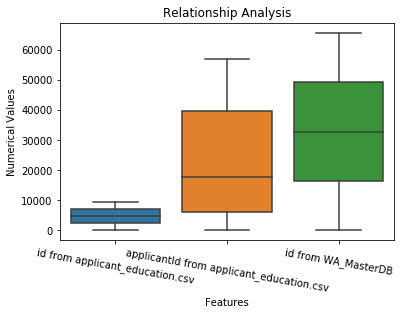

In [23]:
g1 = applicant_education.id
g2 = applicant_education.applicantId
g3 = users.id

ball.analyzeRelationships([['applicant_education.csv', g1], ['applicant_education.csv', g2], ['WA_MasterDB', g3]])

In [107]:
applicant_education_subtable = ball.subTable(applicant_education, ['applicantId'], ['institutionName', 'subjectOrMajor', 'dateAttendedStart', 'dateAttendedEnd', 'degreeTypeOther'])
applicant_education_subtable.head(0)

,institutionName,subjectOrMajor,dateAttendedStart,dateAttendedEnd,degreeTypeOther
applicantId,,,,,


In [108]:
# search for tables that contain both "applicant" and "user" information
a3 = ball.tableSearch(['applicant', 'user'], mode='INTERSECTION')
a3

['../Brainwahve CSV/applicant_profiles.csv']

In [110]:
# we've already checked out applican_profiles.csv, so we'll directly merge applicant_education_subtable to WA_MasterDB

WA_MasterDB2 = ball.mergeTables([WA_MasterDB, applicant_education_subtable])
WA_MasterDB2 = WA_MasterDB2.reset_index().set_index(['id','firstName'])
WA_MasterDB2.head(0)



Number of Dropped Rows:  47924


,,zip,city,totalYearsExperience,industryYearsExperience,workedLastInIndustry,institutionName,subjectOrMajor,dateAttendedStart,dateAttendedEnd,degreeTypeOther
id,firstName,,,,,,,,,,


In [111]:
# you can always use pandas groupby aggregate function to combine rows 
# use applymap to apply a function to every string. in this case, applymap joins contents of list into a string
WA_MasterDB2_agg = WA_MasterDB2.reset_index().groupby('id').aggregate(lambda x: list(set(x))).applymap(lambda x: ', '.join(map(str, x)))
WA_MasterDB2_agg.head(0)

,firstName,zip,city,totalYearsExperience,industryYearsExperience,workedLastInIndustry,institutionName,subjectOrMajor,dateAttendedStart,dateAttendedEnd,degreeTypeOther
id,,,,,,,,,,,
